# Objective

The objective of this project is to predict flight prices given the various parameters. This will be a regression problem since the target or dependent variable is the price (continuous numeric value).

# Problem Statement
* The tourism industry is changing fast and this is attracting a lot more travelers each year. 
* The airline industry is considered as one of the most sophisticated industry in using complex pricing strategies. 
* Now-a-days flight prices are quite unpredictable. The ticket prices change frequently. Customers are seeking to get the lowest price for their ticket, while airline companies are trying to keep their overall revenue as high as possible. 
* Using technology it is actually possible to reduce the uncertainty of flight prices. So here we will be predicting the flight prices using efficient machine learning techniques.

### Features
1 . ID: Contiguous sample number

2 . Airline: The name of the airline

3 . Date_of_Journey: The date of the journey

4 . Source: The source from which the service begins

5 . Destination: The destination where the service ends

6 . Dep_Time: The time when the journey starts from the source.

7 . Arrival_Time: Time of arrival at the destination.

8 . Duration: Total duration of the flight.

9 . Total_Stops: Total stops between the source and destination.

10 . Additional_Info: Additional information about the flight

### Target
Price: The price of the ticket

### Data Used
Data was used from Kaggle which is a freely available platform for data scientists.

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In the above line of code, We have imported all the required libraries which required for building our Model.

In [3]:
data = pd.read_excel("Data_Train.xlsx")    # Load the Dataset & store in a Variable "data"
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.shape

(10683, 11)

There are 11 Columns & 10683 Rows in our Dataset.

In [5]:
col_names = data.columns

col_names

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

Got all the Columns from our Dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Find the Null values from the Dataset

In [7]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

* As we can see, there are only two columns having null values & it has only 1 null values. 
* We can drop these Null values because they are very less.

In [8]:
data.dropna(inplace = True)

### Lets find categorical variables

In [9]:
# find categorical variables

categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 10 categorical variables

The categorical variables are : ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']


In [10]:
# view the categorical variables

data[categorical].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info


### Now find numerical variables

In [11]:
# find numerical variables

numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 1 numerical variables

The numerical variables are : ['Price']


### Now we will do some Data Cleaning

In [12]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

Lets drop this column because, the data having this columns is irrelevent & if we use this column then it may affect the accuracy of our model.

In [13]:
data.drop('Additional_Info',inplace=True,axis=1)

In [14]:
data.drop('Route',inplace=True,axis=1)

We have dropped 'Route' column.

In [15]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [16]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


### Now Lets do some Data Preprocessing / Feature Engineering

* Now convert column "Date_of_Journey" into "Day" and "Month".

* After that we will column "Date_of_Journey" because "Day" & "Month" are relevent for us but "year" irrelevent.

In [17]:
data['Date_of_Journey'].dtypes

dtype('O')

In [18]:
# parse the dates, currently coded as strings, into datetime format

data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])

In [19]:
# Extract month from date

data['Month'] = data['Date_of_Journey'].dt.month

data['Month'].head()

0     3
1     1
2     9
3    12
4     1
Name: Month, dtype: int64

In [20]:
# Extract day from date

data['Day'] = data['Date_of_Journey'].dt.day

data['Day'].head()

0    24
1     5
2     6
3     5
4     3
Name: Day, dtype: int64

In [21]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Month,Day
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,3,24
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3


### Now Two new Columns has created "Month" & "Day"
* Now we will drop "Date_of_Journey" column

In [22]:
data.drop('Date_of_Journey',inplace=True,axis=1)

### Now, Lets split "Dep_Time" column into Hour & Min.

In [23]:
data['Dep_Time'].dtypes

data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])

In [24]:
# Extract Hour from Time

data['Dep_hour'] = data['Dep_Time'].dt.hour

data['Dep_hour'].head()

0    22
1     5
2     9
3    18
4    16
Name: Dep_hour, dtype: int64

In [25]:
# Extract Min from Time

data['Dep_min'] = data['Dep_Time'].dt.minute

data['Dep_min'].head()

0    20
1    50
2    25
3     5
4    50
Name: Dep_min, dtype: int64

In [26]:
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Month,Day,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,2021-12-11 22:20:00,01:10 22 Mar,2h 50m,non-stop,3897,3,24,22,20
1,Air India,Kolkata,Banglore,2021-12-11 05:50:00,13:15,7h 25m,2 stops,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,2021-12-11 09:25:00,04:25 10 Jun,19h,2 stops,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,2021-12-11 18:05:00,23:30,5h 25m,1 stop,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,2021-12-11 16:50:00,21:35,4h 45m,1 stop,13302,1,3,16,50


Now Lets drop "Dep_Time" column because two New columns has been created 'Dep_hour' & 'Dep_min'.

In [27]:
data.drop('Dep_Time',inplace=True,axis=1)

In [31]:
data.Duration.unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

* We also have duration information on the ‘Duration’ variable. This variable contains both duration hours and minutes information combined.

* We cannot Seperate 'Hours' & 'Minutes' from column "Duration" as we did in previous steps, because it's format is Different.

In [32]:
def get_duration(x):
    x=x.split(' ')
    hours=0
    mins=0
    if len(x)==1:
        x=x[0]
        if x[-1]=='h':
            hours=int(x[:-1])
        else:
            mins=int(x[:-1])
    else:
        hours=int(x[0][:-1])
        mins=int(x[1][:-1])
    return hours,mins
data['Duration_hours']=data.Duration.apply(lambda x:get_duration(x)[0])
data['Duration_mins']=data.Duration.apply(lambda x:get_duration(x)[1])
data.drop(["Duration"], axis = 1, inplace = True)

In [34]:
# Now, we take care of Arrival_Time

data['Arrival_hr'] = pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_min'] = pd.to_datetime(data['Arrival_Time']).dt.minute
data.drop('Arrival_Time', axis = 1, inplace = True)

We have splited 'Arrival_Time' into Hour & Min format.

In [35]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Month,Day,Dep_hour,Dep_min,Duration_hours,Duration_mins,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,24,22,20,2,50,1,10
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,7,25,13,15
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,19,0,4,25
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,5,25,23,30
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,4,45,21,35


### Now Lets do some Data Analysis

<AxesSubplot:xlabel='Airline', ylabel='Price'>

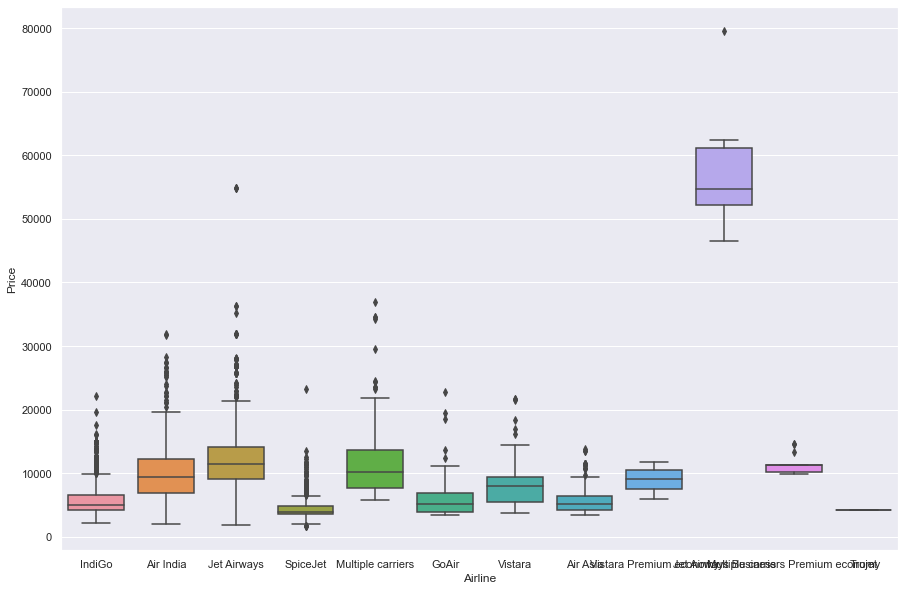

In [36]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Airline", y="Price", data = data)

As we can see the ‘JetAirways Business’ has the highest price range. Other airlines price also varies.

<AxesSubplot:xlabel='Month', ylabel='Price'>

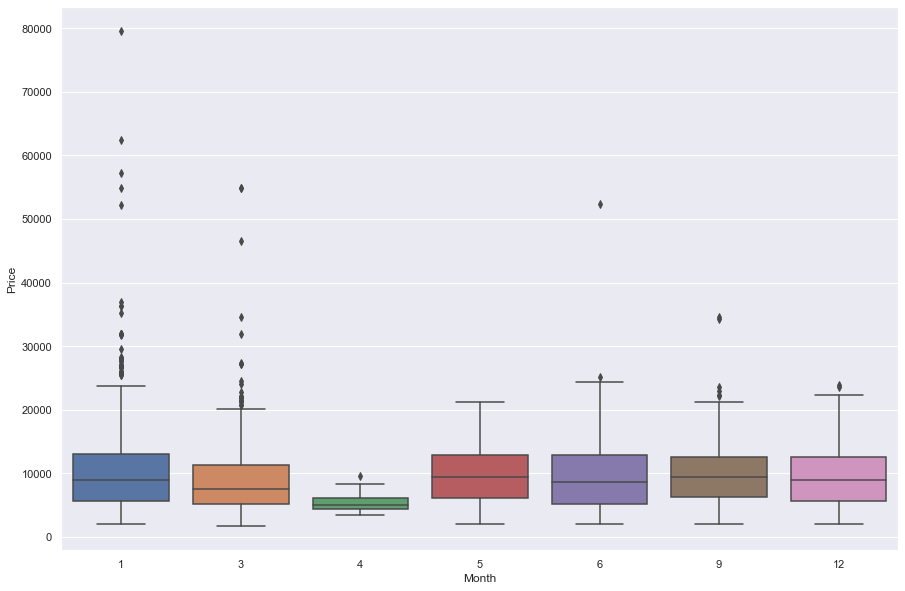

In [38]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Month", y="Price", data = data)

* From this Month-Price distribution we can see that, Most of Outliers are there for the month of 1 st & 3 rd .
* Mean price for each month is almost same , except 4.

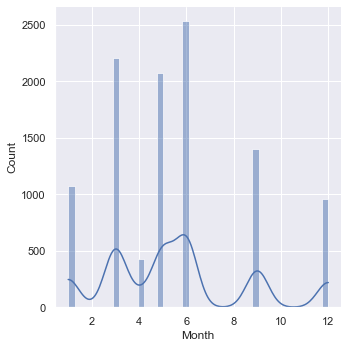

In [39]:
sns.displot(data["Month"],kde=True)

<AxesSubplot:xlabel='Source', ylabel='Price'>

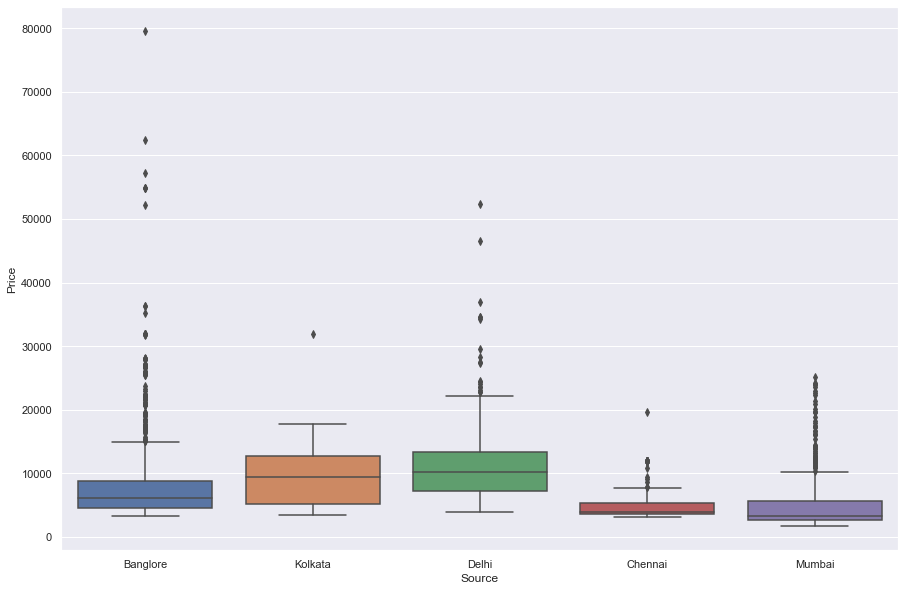

In [40]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Source", y="Price", data = data)  

* From this boxplot , it is clear that most of price has been paid for 'Banglore' & 'Delhi' Locations.
* Chennai has least fair price .

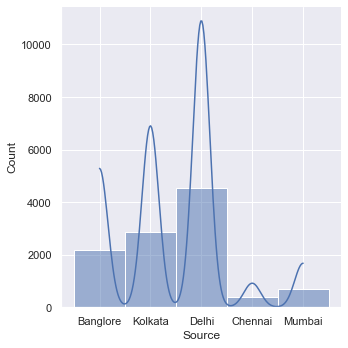

In [42]:
sns.displot(data["Source"],kde=True)

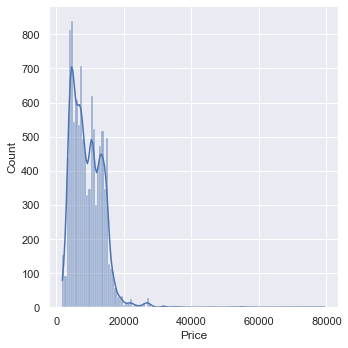

In [43]:
sns.displot(data["Price"],kde=True)

The distribution of 'Price' is look like Right Skewed .

C:\Users\meabh\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


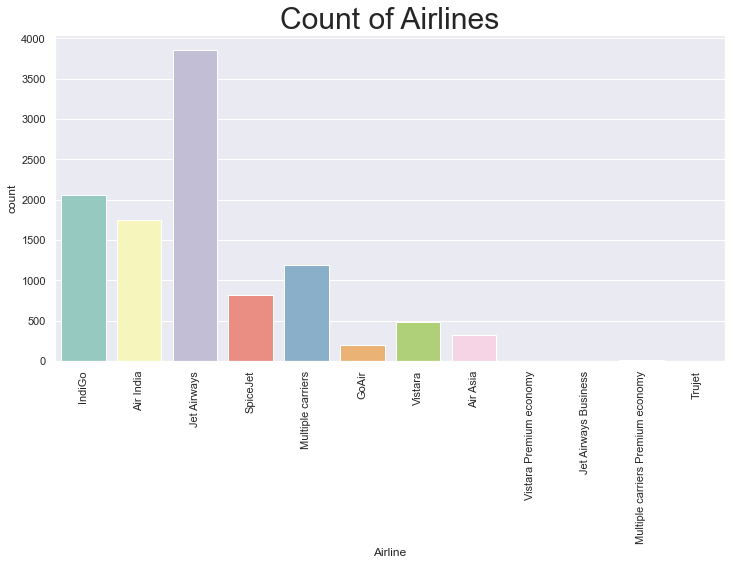

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(data['Airline'], palette='Set3')
plt.title('Count of Airlines', size=30)
plt.xticks(rotation=90)
plt.show()

* There Top 3 Airlines are - 1. Jet Airways, 2. IndiGo, 3. Air India.
* Trujet has almost negligible flights.

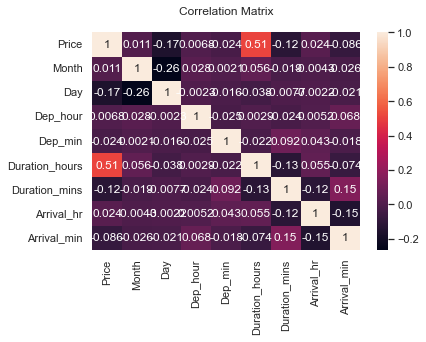

In [45]:
plt.title('Correlation Matrix\n')
sns.heatmap(data.corr(),annot=True)
plt.show()

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Day'}>],
       [<AxesSubplot:title={'center':'Dep_hour'}>,
        <AxesSubplot:title={'center':'Dep_min'}>,
        <AxesSubplot:title={'center':'Duration_hours'}>],
       [<AxesSubplot:title={'center':'Duration_mins'}>,
        <AxesSubplot:title={'center':'Arrival_hr'}>,
        <AxesSubplot:title={'center':'Arrival_min'}>]], dtype=object)

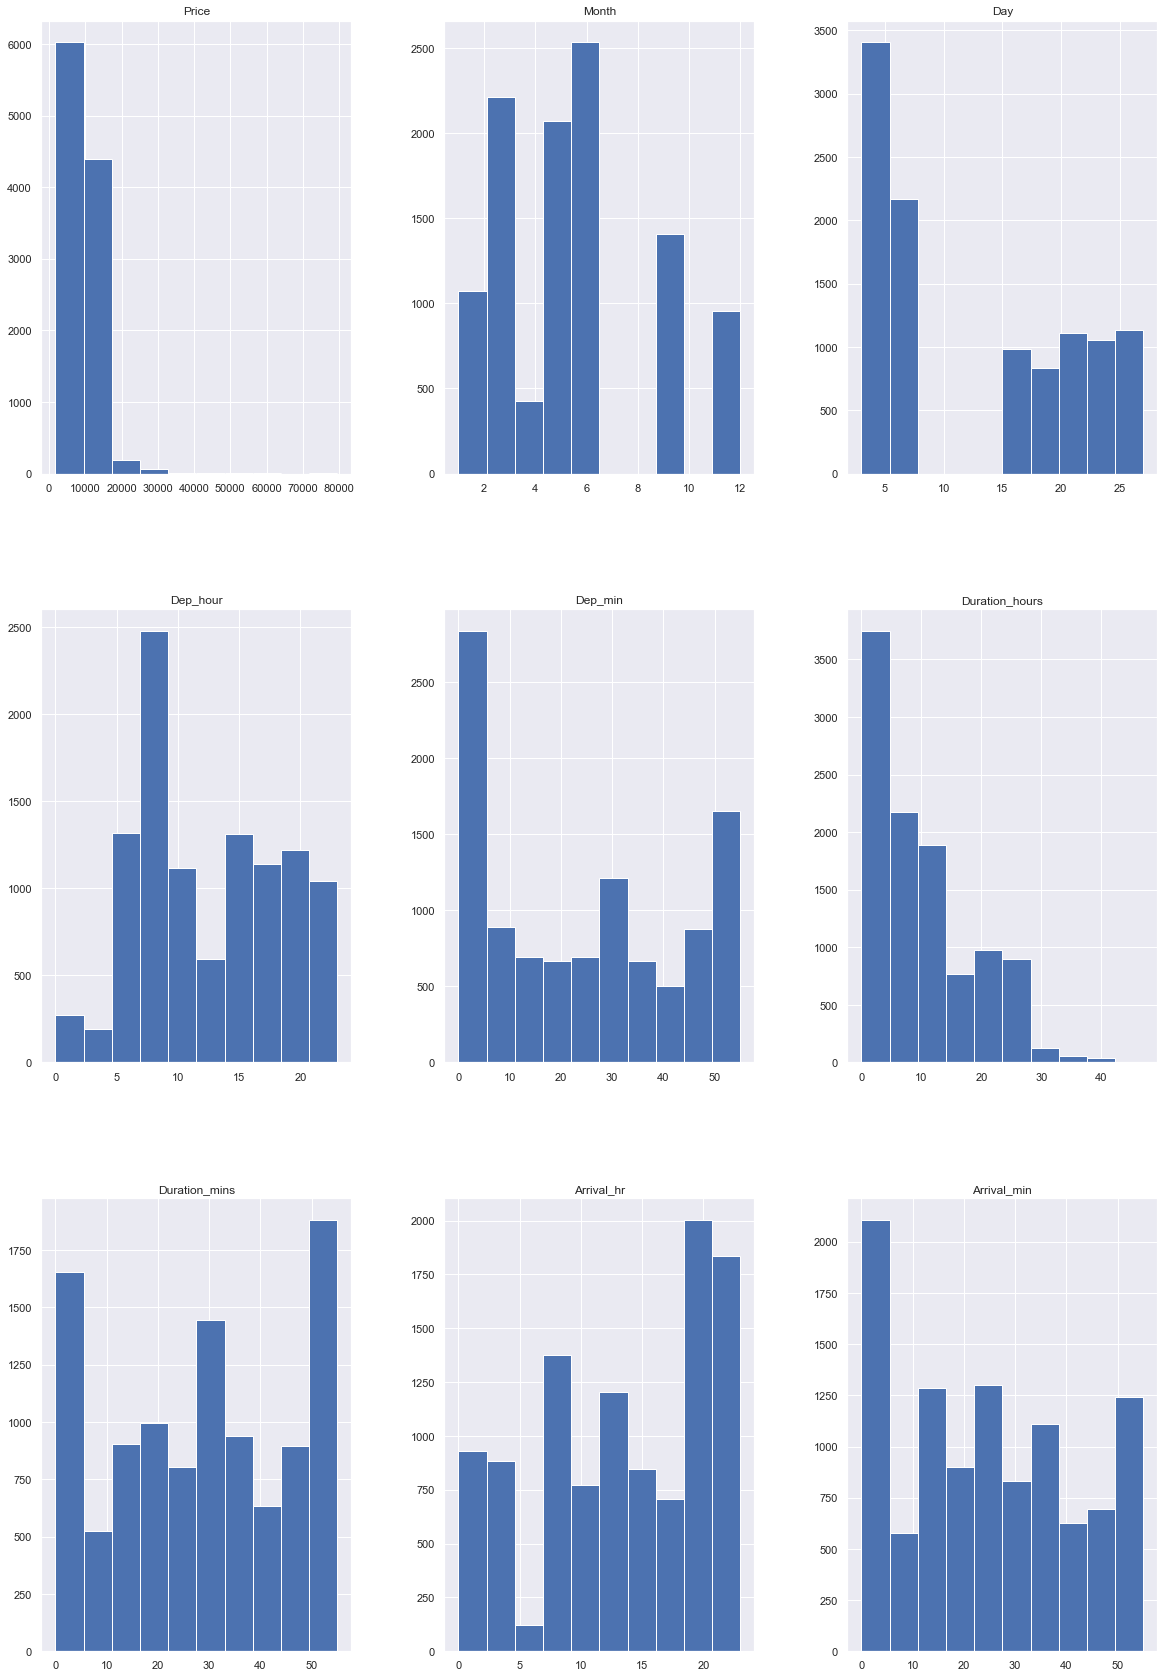

In [46]:
data.hist(figsize=(20,30)) #summary of distribution for relevant variables

### Now we will perform OneHotEncoder on some Column

In [47]:
data_new = pd.get_dummies(data, columns=['Airline','Source','Destination'], drop_first=True)

In [48]:
data_new.head()

,Total_Stops,Price,Month,Day,Dep_hour,Dep_min,Duration_hours,Duration_mins,Arrival_hr,Arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,non-stop,3897,3,24,22,20,2,50,1,10,...,0,0,0,0,0,0,0,0,0,1
1,2 stops,7662,1,5,5,50,7,25,13,15,...,0,0,0,1,0,0,0,0,0,0
2,2 stops,13882,9,6,9,25,19,0,4,25,...,0,0,1,0,0,1,0,0,0,0
3,1 stop,6218,12,5,18,5,5,25,23,30,...,0,0,0,1,0,0,0,0,0,0
4,1 stop,13302,1,3,16,50,4,45,21,35,...,0,0,0,0,0,0,0,0,0,1


In [49]:
data_new.shape

(10682, 30)

In [50]:
# As this is case of Ordinal Categorical data, we can perform LabelEncoder
# Here values are assigned with corresponding keys

data_new['Total_Stops'] = data_new['Total_Stops'].map({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})

In [51]:
data_new.head()

,Total_Stops,Price,Month,Day,Dep_hour,Dep_min,Duration_hours,Duration_mins,Arrival_hr,Arrival_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,3,24,22,20,2,50,1,10,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,7,25,13,15,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,19,0,4,25,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,5,25,23,30,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,4,45,21,35,...,0,0,0,0,0,0,0,0,0,1


# Now Lets do Training & Testing of our Dataset

In [52]:
X = data_new.drop('Price', axis=1)      
y = data_new['Price']        # Target Variable

In [53]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state= 355)

* We have Splited dataset into 80:20 format.
* 80 % for Training & 20 % for Testing.   

### Standarization of Dataset

In [54]:
scalar = StandardScaler()

x_train = scalar.fit_transform(x_train)

x_test = scalar.transform(x_test)

## Now Lets first try with Decision Tree Regressor

In [55]:
price_forest = DecisionTreeRegressor( min_samples_split= 2)
price_forest.fit(x_train,y_train)

DecisionTreeRegressor()

In [56]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(price_forest.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(price_forest.score(x_test, y_test)))

Training set score: 0.9717
Test set score: 0.6593


* Using Decision Tree classifier we got 97 % Training Accuracy & 65 % Testing Accuracy .

* But from this information we can say that our Model with Decision Tree classifier is OverFitted, because there is Huge difference between Training accuracy & Testing Accuracy.

## Random Forest Without HyperParameter Tunning

In [57]:
ran_forest = RandomForestRegressor(random_state=6)

In [58]:
ran_forest.fit(x_train,y_train)

RandomForestRegressor(random_state=6)

In [60]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(ran_forest.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(ran_forest.score(x_test, y_test)))

Training set score: 0.9539
Test set score: 0.7953


* Here Training accuracy is 95 % and Testing accuracy is 79 % 
* We can see by changing an Algorithm we got some Improvement in Accuracy but still it is Overfitted.

## Now lets try Random Forest with HyperParameter Tunning

In [61]:
n_estimators = [5,20,50,100,90,115,130] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = range(2,20,1) # maximum number of levels allowed in each decision tree
min_samples_split = range(2,10,1)  # minimum sample number to split a node
min_samples_leaf = range(1,10,1) # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [63]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [64]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [65]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': range(2, 20),
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'n_estimators': [5, 20, 50, 100, 90,
                                                         115, 130]},
                   random_state=35, verbose=2)

In [66]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100, 90, 115, 130], 'max_features': ['auto', 'sqrt'], 'max_depth': range(2, 20), 'min_samples_split': range(2, 10), 'min_samples_leaf': range(1, 10), 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 16, 'bootstrap': True}  



In [67]:
rand_reg = RandomForestRegressor( max_depth = 16,
 max_features = 'auto',
 min_samples_leaf = 1,
 min_samples_split= 5,
 n_estimators = 100,random_state=6)

In [68]:
rand_reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=16, min_samples_split=5, random_state=6)

In [69]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rand_reg.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(rand_reg.score(x_test, y_test)))

Training set score: 0.9269
Test set score: 0.8190


* Now we got Training accuracy is 92 % & Testing accuracy is about 82 %.

### Now as we can see , we have reduced some effect of OverFitting by using HyperParametr Tunning.

In [71]:
predy_rf = rand_reg.predict(x_test)

In [72]:
from sklearn.metrics import r2_score

r_squared_rf = r2_score(y_test, predy_rf)

r_squared_rf

0.819006714561275

In [73]:
from sklearn.metrics import mean_squared_error

from math import sqrt

In [74]:
rmse_rf = sqrt(mean_squared_error(y_test,predy_rf))      # It is for testing

rmse_rf

1938.7681537748113

## Now Lets train our Model by using XGBoost

In [75]:
# fit model to training data

model = XGBRegressor()

model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [76]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(x_test, y_test)))

Training set score: 0.9369
Test set score: 0.8462


## Now we will do hyperparameter tuning for XGBoost

In [78]:
from sklearn.model_selection import RandomizedSearchCV

In [79]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 
                'learning_rate': [0.01, 0.05, 0.1], 
                'n_estimators': [100, 200, 300, 400, 500], 
                'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}

In [80]:
xgmodel = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)

In [81]:
xgmodel.fit(x_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None,
                                       

In [82]:
# To  find the parameters giving maximum accuracy
xgmodel.best_params_

{'reg_lambda': 0.001,
 'n_estimators': 500,
 'max_depth': 4,
 'learning_rate': 0.1}

In [83]:
# Create new model using the same parameters

new_model = XGBRegressor(learning_rate= 0.1, max_depth= 4, n_estimators= 400, reg_lambda= 0.001)

new_model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=400, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=0.001, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(new_model.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(new_model.score(x_test, y_test)))

Training set score: 0.8966
Test set score: 0.8354


* Now by doing HyperParameter Tunning We got Training Accuracy = 89 % & Testing Accuracy = 83 %.

* We have reduced the effect of OverFitting as compaired with previous without HyperParameter model.

In [86]:
predy = new_model.predict(x_test)

In [87]:
r_squared = r2_score(y_test, predy)

r_squared

0.8354281848694995

In [88]:
rmse = sqrt(mean_squared_error(y_test,predy))      # It is for testing
rmse

1848.7252598871094

### Now Lets Save Our Model for Deployment

In [89]:
import pickle as pk     # to save the model

In [ ]:
filename = "flight_price_rf.pk"

pk.dump(rand_reg,open(filename,"wb")) 